# Processing TESS data from TOI4504

In [1]:
%matplotlib inline
from process_flux_data import *
# import lightkurve as lk
# import pandas as pd
path = '../research/star_systems/TOI-4504/lightkurve/'


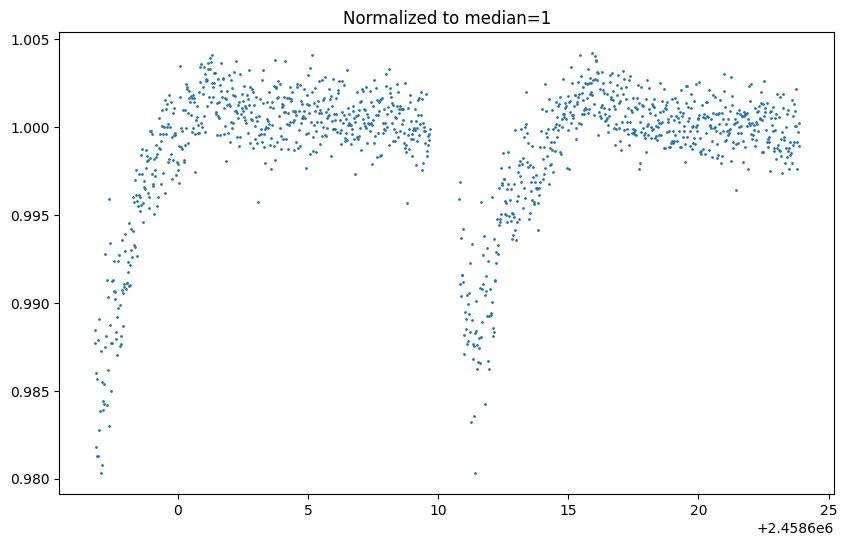

,time,flux,flux_err
0,2.458597e+06,0.988449,0.001239
1,2.458597e+06,0.987716,0.001239
2,2.458597e+06,0.986021,0.001239
3,2.458597e+06,0.981819,0.001239
4,2.458597e+06,0.981295,0.001239
...,...,...,...
1236,2.458624e+06,0.999157,0.001239
1237,2.458624e+06,0.997623,0.001239
1238,2.458624e+06,0.999709,0.001239
1239,2.458624e+06,0.998932,0.001239


In [2]:
df = csv2df(path+"11/11_QLP_1800.csv")
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

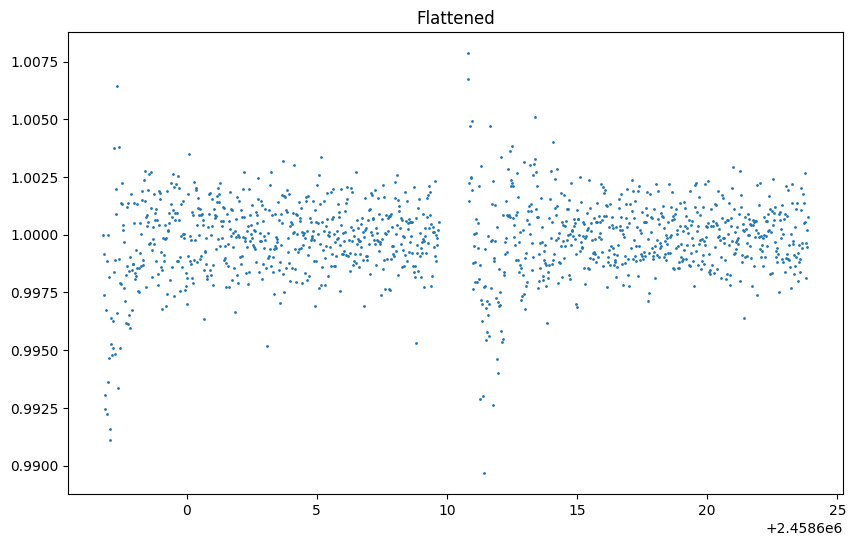

In [3]:
lc = df2lc(df)
lc2 = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df2 = lc2df(lc2)
plot_this(df2.time, [df2.flux], ["flux"], title="Flattened")
# df2

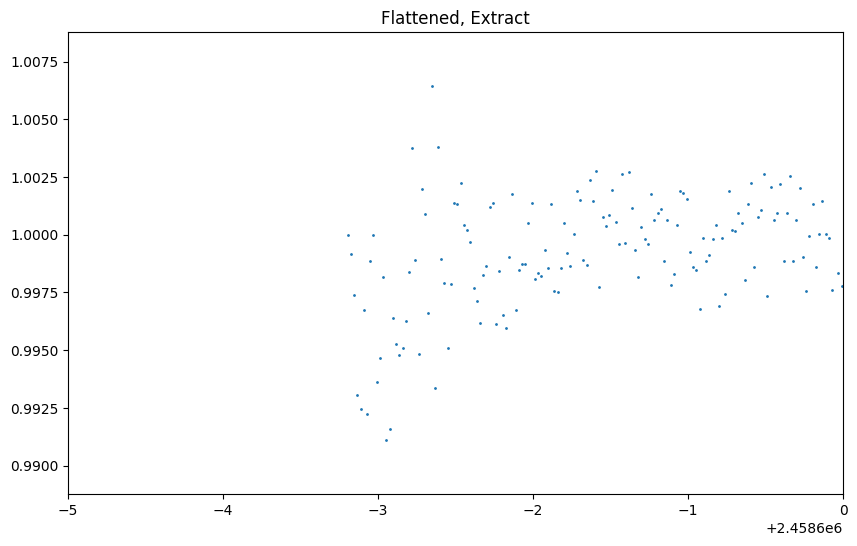

In [4]:
plot_this(df2.time, [df2.flux], ["flux"], title="Flattened, Extract", left=2458595, right=2458600)

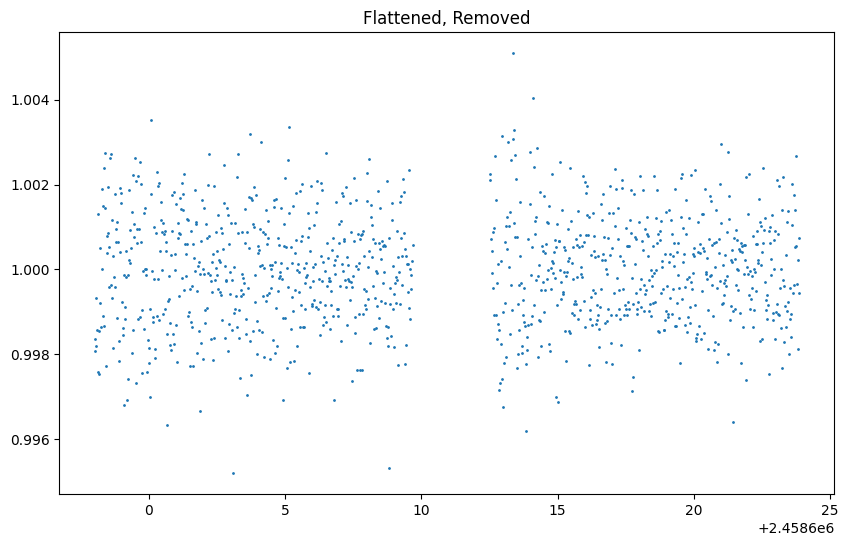

In [5]:
df3 = remove_from_df(df2, 2458610, 2458612.5)
df3 = remove_from_df(df3, 2458596, 2458598)
plot_this(df3.time, [df3.flux], ["flux"], title="Flattened, Removed")


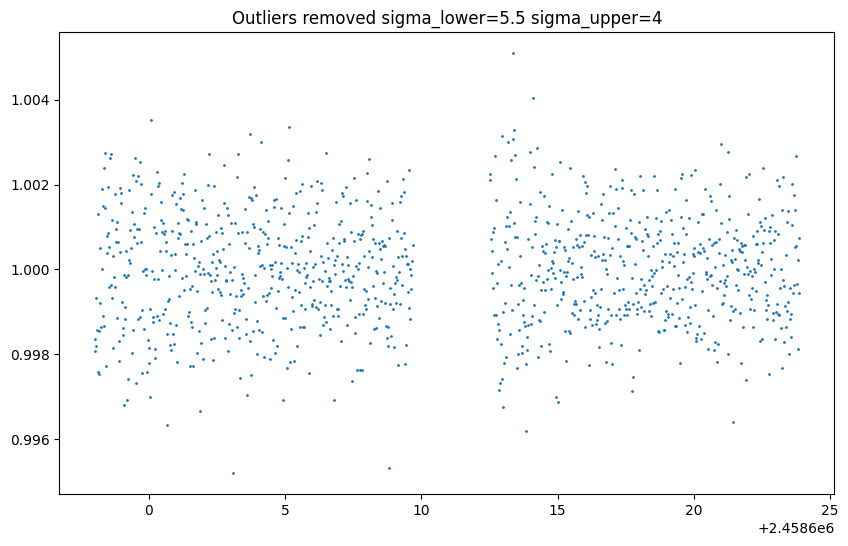

In [6]:
sigma_lower=5.5
sigma_upper=4
lc3 = df2lc(df3)
lc4 = lc3.remove_outliers(sigma_lower=sigma_lower, sigma_upper=sigma_upper)
df4 = lc2df(lc4)
plot_this(df4.time, [df4.flux], ["flux"], title=f"Outliers removed {sigma_lower=} {sigma_upper=}")
# df3